In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from main_grape.Grape import Grape
%pylab inline
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining time scales
total_time = 1.0
steps = 100


#Defining H0

H0 = np.zeros([4,4])
       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1,2,3]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2,3]
states_draw_names = ['00','01','10','11']

#Defining U (Target)

#U= iswap().full()
U = np.zeros([4,4],dtype=complex)
U[0,0]=1
U[1,2] = 0+1j
U[2,1] = 0+1j
U[3,3] = 1

#Defining U0 (Initial)
q_identity = np.identity(4)
U0= q_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))

Q_xx = np.kron(Q_x,Q_x)
Q_yy = np.kron(Q_y,Q_y)
Q_zz = np.kron(Q_z,Q_z)

Hops = [Q_xx,Q_yy,Q_zz]
ops_max_amp = [4.0,4.0, 2*np.pi*2.0]
Hnames =['xx','yy', 'zz']


#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U


[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


L-BFGS-B optimization done


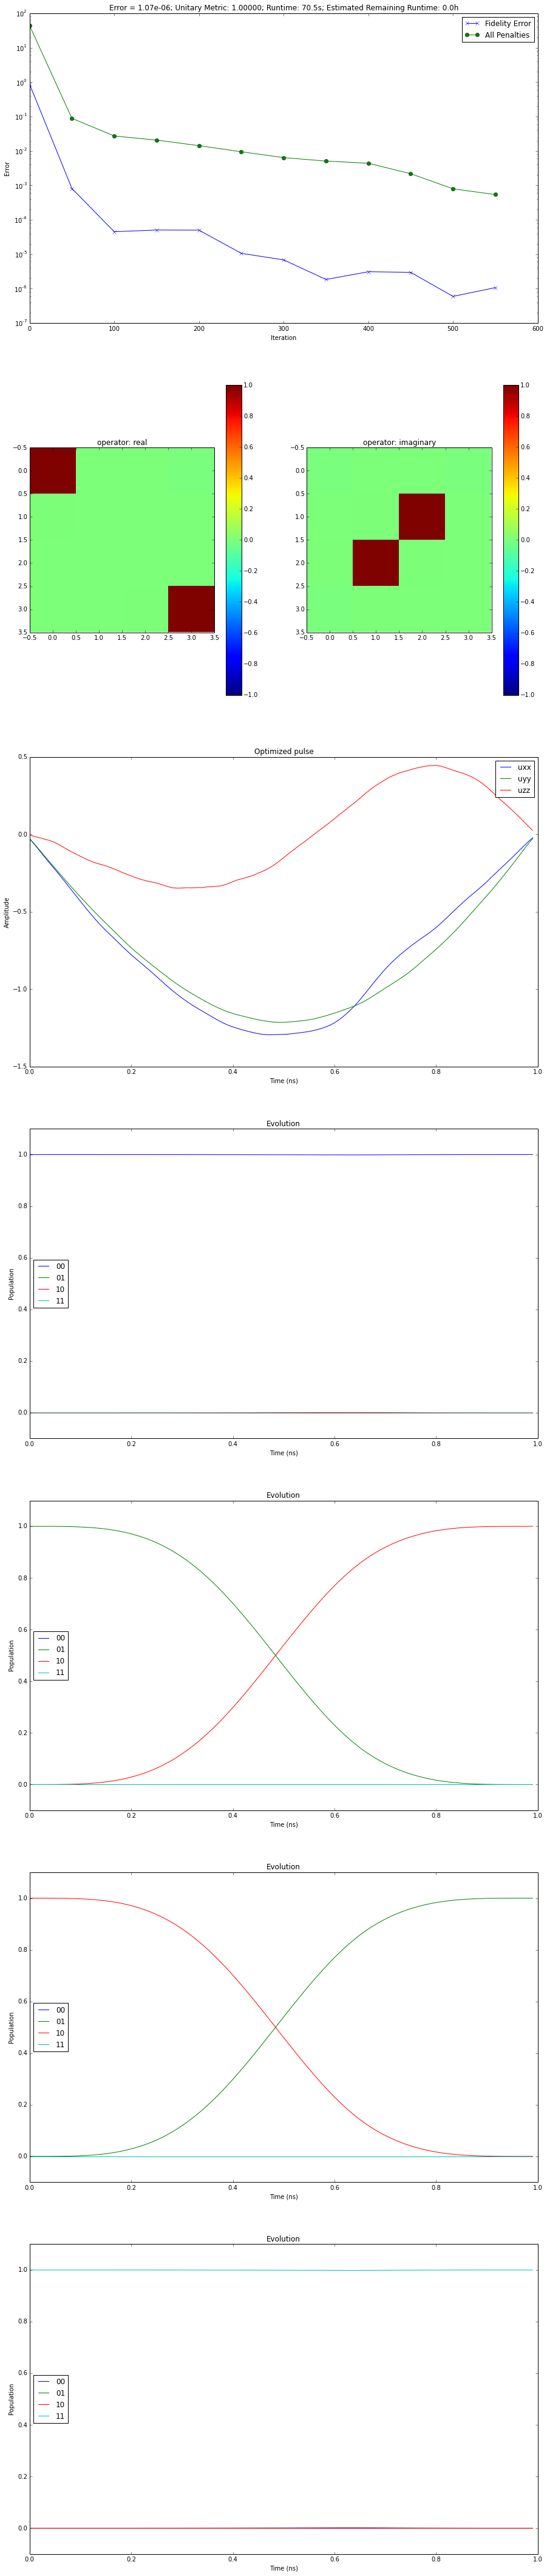

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names] ,
                    maxA = ops_max_amp, use_gpu=True, method = 'L-BFGS-B', switch = False)